# A Deep Dive into the ASRS Dataset

ASRS (Aviation Safety Reporting System) hosts flight and safety information voluntarily reported by the flight pilots and personnel.

Motivation
After the Boeing 737 Max 8 incidents, I decided to look at some of the publicly available datasets. ASRS seems to be the most well known one. This is a deep dive into the 20 year dataset between 2000 and 2019.

In [7]:
import pandas as pd

# there are 97 columns data; by default notebook only show a few columns. Thus need to set max_columns to None
# in order to show and inspect all columns 
pd.options.display.max_columns = None

In [52]:
# settings for matplatlib
import matplotlib.pyplot as plt

# set plot figure size
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 9]

# show plot
plt.show()

In [2]:
df = pd.read_parquet("ASRS.parquet.gzip")

## An initial look at the dataset

Top five rows

In [8]:
df[:5]

,__ACN,Time__Date,Time__Local_Time_Of_Day,Place__Locale_Reference,Place__State_Reference,Place__Relative_Position.Angle.Radial,Place__Relative_Position.Distance.Nautical_Miles,Place__Altitude.AGL.Single_Value,Place__Altitude.MSL.Single_Value,Environment__Flight_Conditions,Environment__Weather_Elements_And_Visibility,Environment__Work_Environment_Factor,Environment__Light,Environment__Ceiling,Environment__RVR.Single_Value,Aircraft_1__ATC_And_Advisory,Aircraft_1__Aircraft_Operator,Aircraft_1__Make_Model_Name,Aircraft_1__Aircraft_Zone,Aircraft_1__Crew_Size,Aircraft_1__Operating_Under_FAR_Part,Aircraft_1__Flight_Plan,Aircraft_1__Mission,Aircraft_1__Nav_In_Use,Aircraft_1__Flight_Phase,Aircraft_1__Route_In_Use,Aircraft_1__Airspace,Aircraft_1__Maintenance_Status.Maintenance_Deferred,Aircraft_1__Maintenance_Status.Records_Complete,Aircraft_1__Maintenance_Status.Released_For_Service,Aircraft_1__Maintenance_Status.Required_And_Correct_Doc_On_Board,Aircraft_1__Maintenance_Status.Maintenance_Type,Aircraft_1__Maintenance_Status.Maintenance_Items_Involved,Aircraft_1__Cabin_Lighting,Aircraft_1__Number_Of_Seats.Number,Aircraft_1__Passengers_On_Board.Number,Aircraft_1__Crew_Size_Flight_Attendant.Number_Of_Crew,Component__Aircraft_Component,Component__Manufacturer,Component__Aircraft_Reference,Component__Problem,Aircraft_2__ATC_And_Advisory,Aircraft_2__Aircraft_Operator,Aircraft_2__Make_Model_Name,Aircraft_2__Aircraft_Zone,Aircraft_2__Crew_Size,Aircraft_2__Operating_Under_FAR_Part,Aircraft_2__Flight_Plan,Aircraft_2__Mission,Aircraft_2__Nav_In_Use,Aircraft_2__Flight_Phase,Aircraft_2__Route_In_Use,Aircraft_2__Airspace,Aircraft_2__Maintenance_Status.Maintenance_Deferred,Aircraft_2__Maintenance_Status.Records_Complete,Aircraft_2__Maintenance_Status.Released_For_Service,Aircraft_2__Maintenance_Status.Required_And_Correct_Doc_On_Board,Aircraft_2__Maintenance_Status.Maintenance_Type,Aircraft_2__Maintenance_Status.Maintenance_Items_Involved,Aircraft_2__Cabin_Lighting,Aircraft_2__Number_Of_Seats.Number,Aircraft_2__Passengers_On_Board.Number,Aircraft_2__Crew_Size_Flight_Attendant.Number_Of_Crew,Person_1__Location_Of_Person,Person_1__Location_In_Aircraft,Person_1__Reporter_Organization,Person_1__Function,Person_1__Qualification,Person_1__Experience,Person_1__Cabin_Activity,Person_1__Human_Factors,Person_1__Communication_Breakdown,Person_1__ASRS_Report_Number.Accession_Number,Person_2__Location_Of_Person,Person_2__Location_In_Aircraft,Person_2__Reporter_Organization,Person_2__Function,Person_2__Qualification,Person_2__Experience,Person_2__Cabin_Activity,Person_2__Human_Factors,Person_2__Communication_Breakdown,Person_2__ASRS_Report_Number.Accession_Number,Events__Anomaly,Events__Miss_Distance,Events__Were_Passengers_Involved_In_Event,Events__Detector,Events__When_Detected,Events__Result,Assessments__Contributing_Factors_And_Situations,Assessments__Primary_Problem,Report_1__Narrative,Report_1__Callback,Report_2__Narrative,Report_2__Callback,Report_1__Synopsis,Year
0,458885,200001,0601-1200,ZZZ.Airport,US,None,0,0,None,None,None,None,Daylight,None,None,None,Personal,PA-34-200 Seneca I,None,2,Part 91,None,Personal,None,Parked,None,None,None,None,Y,Y,Scheduled Maintenance,None,None,6,None,None,Transponder,None,X,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Aircraft X,None,Personal,Pilot Flying; Single Pilot,Flight Crew Private; Flight Crew Multiengine; ...,Flight Crew Last 90 Days 20; Flight Crew Total...,None,None,None,458885,None,None,Government,None,Maintenance Powerplant; Maintenance Airframe,None,None,None,None,None,Aircraft Equipment Problem Less Severe,None,None,None,None,General None Reported / Taken; General Mainten...,Logbook Entry; Human Factors; Aircraft,Human Factors,I HAVE DISCOVERED THAT MY AIRLINE IS IN VIOLAT...,None,None,None,A PIPER 34 OWNER RPTED THE BIANNUAL ALTIMETER ...,2000
1,458992,200001,1801-2400,PVD.Airport,RI,None,0,0,None,Mixed,Fog; 0.25,None,Night,None,1000,Tow

Obvervations:

1. Out of privacy and anomymity considerations, the Time__Date column only have year and month format in YYYYMM format.

2. Many of the columns are free text instead of well defined data types. So need some work to clean and transform certain columns.


### Incidents by Dates

In [14]:
# there is one row, where the Time__Date is incorrect:
df[df['Time__Date'].str.contains(';')]

,__ACN,Time__Date,Time__Local_Time_Of_Day,Place__Locale_Reference,Place__State_Reference,Place__Relative_Position.Angle.Radial,Place__Relative_Position.Distance.Nautical_Miles,Place__Altitude.AGL.Single_Value,Place__Altitude.MSL.Single_Value,Environment__Flight_Conditions,Environment__Weather_Elements_And_Visibility,Environment__Work_Environment_Factor,Environment__Light,Environment__Ceiling,Environment__RVR.Single_Value,Aircraft_1__ATC_And_Advisory,Aircraft_1__Aircraft_Operator,Aircraft_1__Make_Model_Name,Aircraft_1__Aircraft_Zone,Aircraft_1__Crew_Size,Aircraft_1__Operating_Under_FAR_Part,Aircraft_1__Flight_Plan,Aircraft_1__Mission,Aircraft_1__Nav_In_Use,Aircraft_1__Flight_Phase,Aircraft_1__Route_In_Use,Aircraft_1__Airspace,Aircraft_1__Maintenance_Status.Maintenance_Deferred,Aircraft_1__Maintenance_Status.Records_Complete,Aircraft_1__Maintenance_Status.Released_For_Service,Aircraft_1__Maintenance_Status.Required_And_Correct_Doc_On_Board,Aircraft_1__Maintenance_Status.Maintenance_Type,Aircraft_1__Maintenance_Status.Maintenance_Items_Involved,Aircraft_1__Cabin_Lighting,Aircraft_1__Number_Of_Seats.Number,Aircraft_1__Passengers_On_Board.Number,Aircraft_1__Crew_Size_Flight_Attendant.Number_Of_Crew,Component__Aircraft_Component,Component__Manufacturer,Component__Aircraft_Reference,Component__Problem,Aircraft_2__ATC_And_Advisory,Aircraft_2__Aircraft_Operator,Aircraft_2__Make_Model_Name,Aircraft_2__Aircraft_Zone,Aircraft_2__Crew_Size,Aircraft_2__Operating_Under_FAR_Part,Aircraft_2__Flight_Plan,Aircraft_2__Mission,Aircraft_2__Nav_In_Use,Aircraft_2__Flight_Phase,Aircraft_2__Route_In_Use,Aircraft_2__Airspace,Aircraft_2__Maintenance_Status.Maintenance_Deferred,Aircraft_2__Maintenance_Status.Records_Complete,Aircraft_2__Maintenance_Status.Released_For_Service,Aircraft_2__Maintenance_Status.Required_And_Correct_Doc_On_Board,Aircraft_2__Maintenance_Status.Maintenance_Type,Aircraft_2__Maintenance_Status.Maintenance_Items_Involved,Aircraft_2__Cabin_Lighting,Aircraft_2__Number_Of_Seats.Number,Aircraft_2__Passengers_On_Board.Number,Aircraft_2__Crew_Size_Flight_Attendant.Number_Of_Crew,Person_1__Location_Of_Person,Person_1__Location_In_Aircraft,Person_1__Reporter_Organization,Person_1__Function,Person_1__Qualification,Person_1__Experience,Person_1__Cabin_Activity,Person_1__Human_Factors,Person_1__Communication_Breakdown,Person_1__ASRS_Report_Number.Accession_Number,Person_2__Location_Of_Person,Person_2__Location_In_Aircraft,Person_2__Reporter_Organization,Person_2__Function,Person_2__Qualification,Person_2__Experience,Person_2__Cabin_Activity,Person_2__Human_Factors,Person_2__Communication_Breakdown,Person_2__ASRS_Report_Number.Accession_Number,Events__Anomaly,Events__Miss_Distance,Events__Were_Passengers_Involved_In_Event,Events__Detector,Events__When_Detected,Events__Result,Assessments__Contributing_Factors_And_Situations,Assessments__Primary_Problem,Report_1__Narrative,Report_1__Callback,Report_2__Narrative,Report_2__Callback,Report_1__Synopsis,Year
35113,620214,201806; 200407,1201-1800,BUR.Airport,CA,None,5,None,2800,VMC,5,None,Dusk,None,None,Tower BUR.Tower,Air Carrier,A320,None,2,Part 121,IFR,Passenger,None,Descent; Initial Approach,Visual Approach,Class C BUR.C; Class E SCT.E,None,None,None,None,None,None,None,None,None,None,None,None,None,None,TRACON SCT.TRACON,None,Any Unknown or Unlisted Aircraft Manufacturer,None,None,None,None,None,None,None,None,Class C BUR.C; Class E SCT.E,None,None,None,None,None,None,None,None,None,None,Aircraft X,None,Air Carrier,Pilot Flying; First Officer,Flight Crew Commercial; Flight Crew Instrument...,Flight Crew Last 90 Days 260; Flight Crew Tota...,None,None,None,620214,Aircraft X,None,Air Carrier,Pilot Not Flying; Captain,None,None,None,None,None,None,Conflict Airborne Conflict; Deviation - Altitu...,Horizontal 9000; Vertical 400,None,Automation Aircraft TA,None,None,Environment - Non Weather Related; Human Factors,Human Factors,ON VISUAL APCH WITH LNDG CLRNC; APCH ISSUED 'A...,None,None,None,AN A320 FLT

In [46]:
# so we need to exclude that row
clean_df = df[~df['Time__Date'].str.contains(';')]
clean_df = clean_df[clean_df['Time__Date'].str.len() == 6]

clean_df['Time__Date'] = pd.to_datetime(clean_df['Time__Date'], format='%Y%m')
clean_df['Time__Date'] = clean_df['Time__Date'].dt.date

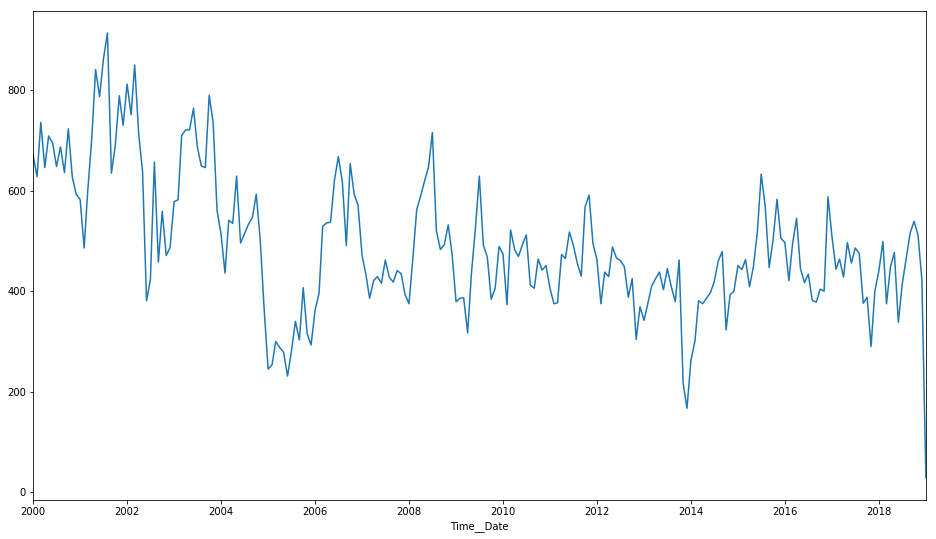

In [51]:
# lets group the rows by date and count how many events per month
incidents_count_df = clean_df.groupby('Time__Date')['__ACN'].count()

incidents_count_df.plot.line()

## Event Anomaly - Word Cloud

We want to specifically look at the event anomaly column, and see what are the most common anomaly problems?

In [56]:
list_of_events = clean_df['Events__Anomaly'].to_list()
list_of_events[:10]

['Aircraft Equipment Problem Less Severe',
 'Deviation - Procedural Published Material / Policy; Deviation - Procedural FAR; Inflight Event / Encounter Weather / Turbulence',
 'Other Computer Program Interruption',
 'Aircraft Equipment Problem Critical',
 'Aircraft Equipment Problem Critical; Deviation - Altitude Overshoot',
 'Aircraft Equipment Problem Critical; Deviation - Procedural Published Material / Policy',
 'Aircraft Equipment Problem Less Severe; Other Lost Communication',
 'Aircraft Equipment Problem Less Severe; Deviation - Procedural Published Material / Policy; Deviation - Procedural Maintenance',
 'Deviation - Altitude Overshoot; Deviation - Procedural Published Material / Policy; Deviation - Procedural Clearance; Other Fatigue',
 'Deviation - Procedural Published Material / Policy; Other Situational Awareness Traffic Management']

In [67]:
# want to tokenize the strings from the column
from collections import defaultdict
word_counts = defaultdict(int)

for event_str in list_of_events:
    if not event_str:
        continue
    words = event_str.split(' ')
    words = map(lambda x: x.strip(';,'), words)
    words = list(filter(lambda x: x != '/' and x != '-', words))
    
    for word in words:
        word_counts[word] = word_counts[word] + 1
        

In [70]:
sorted_word_counts = sorted(word_counts.items(), key=lambda t: -t[1])


In [72]:
sorted_word_counts[:20]

[('Deviation', 137729),
 ('Procedural', 112104),
 ('Aircraft', 56836),
 ('Material', 51348),
 ('Policy', 50918),
 ('Published', 50896),
 ('Problem', 42853),
 ('Equipment', 42792),
 ('Event', 40720),
 ('Conflict', 35806),
 ('All', 34946),
 ('Types', 34939),
 ('Encounter', 33403),
 ('Critical', 29212),
 ('Other', 27515),
 ('Ground', 23968),
 ('Clearance', 23944),
 ('Inflight', 23474),
 ('FAR', 22730),
 ('Less', 19116)]